### Load Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [7]:
df=pd.read_csv('winequality-red.csv',sep=';')

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.shape

(1599, 12)

In [18]:
features=df.columns[:-1].values
label=[df.columns[-1]]

In [19]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

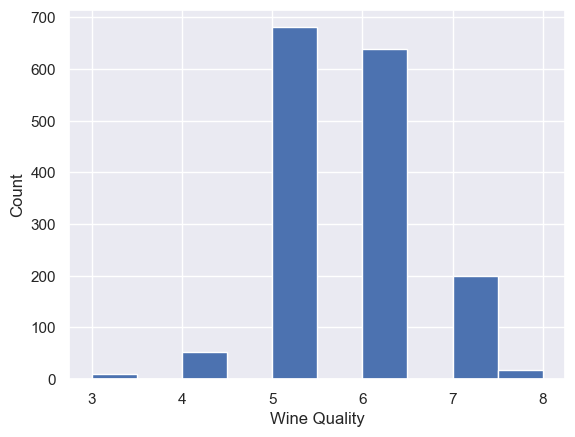

In [23]:
sns.set()
df.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

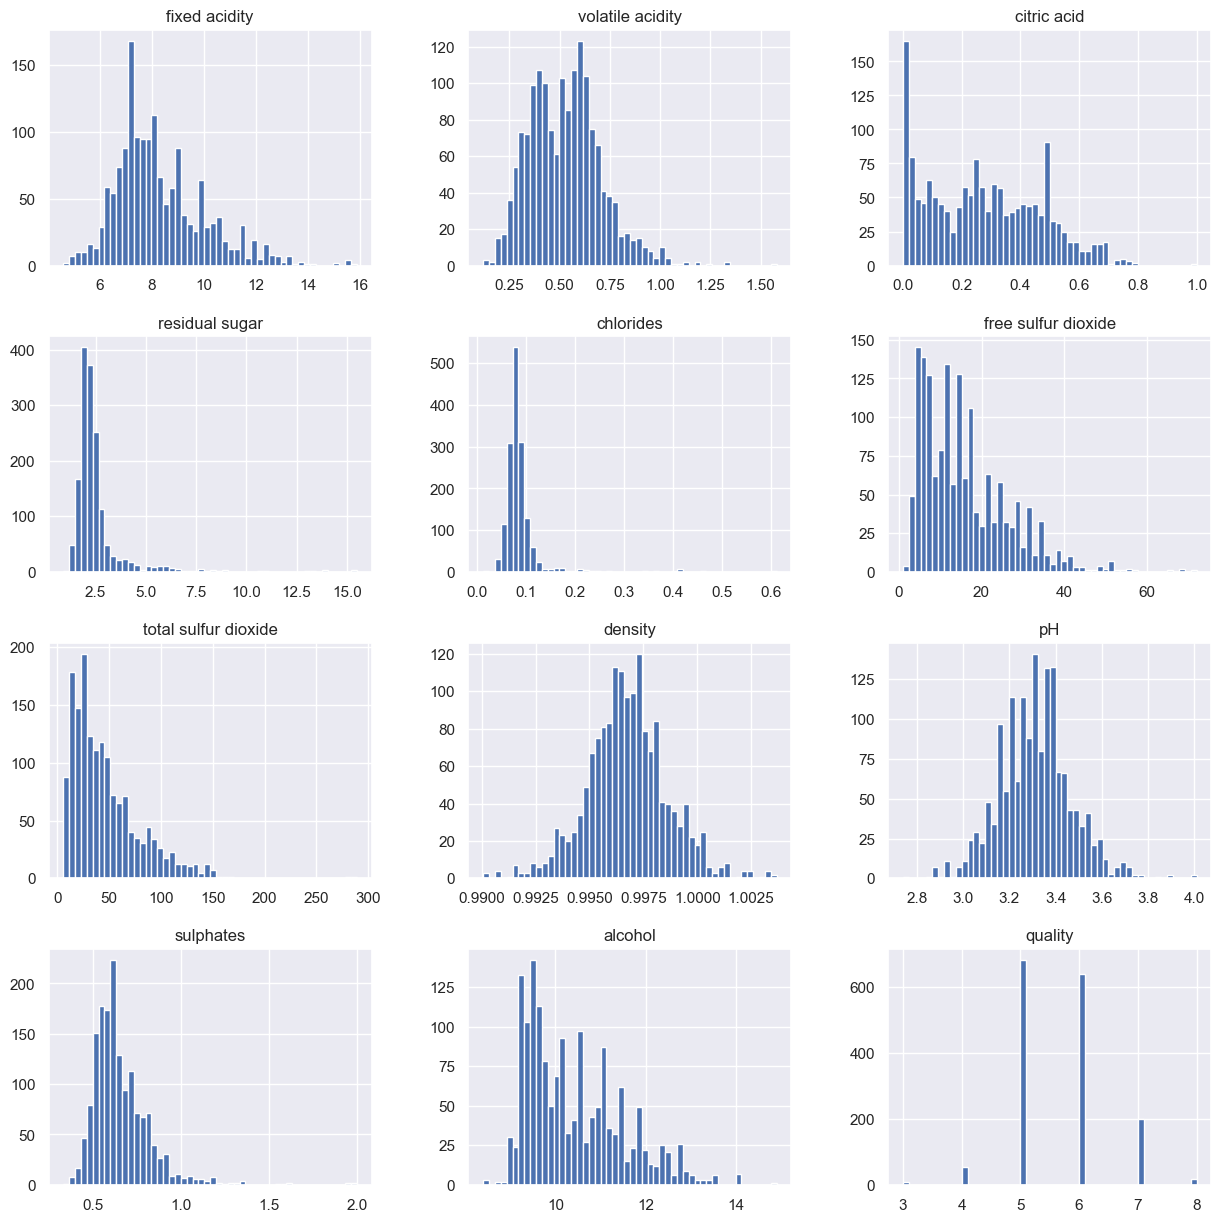

In [28]:
df.hist(bins=50,figsize=(15,15))
plt.show()

### Data splitting

In [29]:
def split_train_test(df,test_size):
    np.random.seed(42)
    shuffled_indices=np.random.permutation(len(df))
    set_test_size=int(len(df)*test_size)
    train_ind=shuffled_indices[set_test_size:]
    test_ind=shuffled_indices[:set_test_size]
    return df.iloc[train_ind],df.iloc[test_ind]

In [30]:
split_train_test(df,0.2)

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 704             9.1             0.765         0.04             1.6      0.078   
 493             8.7             0.690         0.31             3.0      0.086   
 354             6.1             0.210         0.40             1.4      0.066   
 342            10.9             0.390         0.47             1.8      0.118   
 834             8.8             0.685         0.26             1.6      0.088   
 ...             ...               ...          ...             ...        ...   
 1130            9.1             0.600         0.00             1.9      0.058   
 1294            8.2             0.635         0.10             2.1      0.073   
 860             7.2             0.620         0.06             2.7      0.077   
 1459            7.9             0.200         0.35             1.7      0.054   
 1126            5.8             0.290         0.26             1.7      0.063   
 
       free su

In [31]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.33,random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.33,random_state=42)

In [ ]:
train_sss,test_sss=next(sss.split(df,df.quality))
sss_train_set=df.iloc[train_sss]
sss_test_set=df.iloc[test_sss]

In [46]:
overall_dist=df['quality'].value_counts()/len(df)
sss_dist=sss_test_set['quality'].value_counts()/len(sss_test_set)
random_dist=test_set['quality'].value_counts()/len(test_set)

In [47]:
dist_comparison=pd.DataFrame({
    'overall':overall_dist,
    'stratified':sss_dist,
    'random':random_dist
})
dist_comparison['diff(s-o)']=dist_comparison['stratified']-dist_comparison['overall']
dist_comparison['diff(s-o)_pct']=100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])
dist_comparison['diff(r-o)']=dist_comparison['random']-dist_comparison['overall']
dist_comparison['diff(r-o)_pct']=100*(dist_comparison['diff(r-o)']/dist_comparison['overall'])

In [48]:
dist_comparison

,overall,stratified,random,diff(s-o),diff(s-o)_pct,diff(r-o),diff(r-o)_pct
5,0.425891,0.426136,0.410985,0.000245,0.057569,-0.014906,-3.500033
6,0.398999,0.399621,0.403409,0.000622,0.155849,0.004410,1.105194
7,0.124453,0.125000,0.132576,0.000547,0.439698,0.008123,6.526953
4,0.033146,0.032197,0.035985,-0.000949,-2.862350,0.002839,8.565609
8,0.011257,0.011364,0.013258,0.000107,0.946970,0.002001,17.771465
3,0.006254,0.005682,0.003788,-0.000572,-9.147727,-0.002466,-39.431818


In [50]:
dist_comparison.loc[:,['diff(s-o)_pct','diff(r-o)_pct']]

,diff(s-o)_pct,diff(r-o)_pct
5,0.057569,-3.500033
6,0.155849,1.105194
7,0.439698,6.526953
4,-2.862350,8.565609
8,0.946970,17.771465
3,-9.147727,-39.431818


### Data Visualizing